# Ford GoBike System Data Analysis - Data Analyst Nanodegree Project


## Introduction

Ford GoBike is a regional public bicycle sharing system in the San Francisco Bay Area, California. Beginning operation in August 2013 as Bay Area Bike Share, the Ford GoBike system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially launched as Ford GoBike in a partnership with Ford Motor Company.

Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

## Data Wrangling

In [4]:
# Importing all packages and setting plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
default_color = sns.color_palette()[0]
import matplotlib.ticker as tick

%matplotlib inline

In [5]:
df = pd.read_csv('202002-baywheels-tripdata.csv')
# Downloaded the most recent file and uploaded to Jupyter

/Users/havishamadhu/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df
# Looking into the dataset

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,62083,2020-02-29 18:32:30.5750,2020-03-01 11:47:14.0850,176.0,MacArthur BART Station,37.828410,-122.266315,267.0,Derby St at College Ave,37.861804,-122.253569,1993,Customer,NaN
1,1364,2020-02-29 23:53:53.7190,2020-03-01 00:16:37.9720,375.0,Grove St at Masonic Ave,37.774836,-122.446546,506.0,7th Ave at Clement St,37.782439,-122.465377,12402,Customer,NaN
2,836,2020-02-29 23:54:03.1970,2020-03-01 00:07:59.8490,375.0,Grove St at Masonic Ave,37.774836,-122.446546,454.0,7th Ave at Cabrillo St,37.775176,-122.465007,2302,Customer,NaN
3,1004,2020-02-29 23:48:34.6480,2020-03-01 00:05:19.2020,179.0,Telegraph Ave at 27th St,37.816073,-122.267886,200.0,2nd Ave at E 18th St,37.800214,-122.253810,902,Customer,NaN
4,1007,2020-02-29 23:48:25.9000,2020-03-01 00:05:13.4490,179.0,Telegraph Ave at 27th St,37.816073,-122.267886,200.0,2nd Ave at E 18th St,37.800214,-122.253810,11578,Customer,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432349,2321,2020-02-27 17:29:40,2020-02-27 18:08:22,NaN,NaN,37.810553,-122.476472,NaN,NaN,37.789625,-122.459580,157125,Subscriber,app
432350,1526,2020-02-01 18:01:12,2020-02-01 18:26:39,NaN,NaN,37.810568,-122.410974,NaN,NaN,37.807980,-122.414038,648380,Customer,app
432351,2596,2020-02-04 15:39:49,2020-02-04 16:23:06,NaN,NaN,37.810572,-122.476453,NaN,NaN,37.806278,-122.422227,438416,Subscriber,app
432352,3072,2020-02-25 20:22:22,2020-02-25 21:13:34,NaN,NaN,37.810688,-122.410335,NaN,NaN,37.807886,-122.418122,926639,Customer,app


In [7]:
df.info()
# Gives info about the number of null values present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432354 entries, 0 to 432353
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             432354 non-null  int64  
 1   start_time               432354 non-null  object 
 2   end_time                 432354 non-null  object 
 3   start_station_id         161723 non-null  float64
 4   start_station_name       161723 non-null  object 
 5   start_station_latitude   432354 non-null  float64
 6   start_station_longitude  432354 non-null  float64
 7   end_station_id           162194 non-null  float64
 8   end_station_name         162194 non-null  object 
 9   end_station_latitude     432354 non-null  float64
 10  end_station_longitude    432354 non-null  float64
 11  bike_id                  432354 non-null  int64  
 12  user_type                432354 non-null  object 
 13  rental_access_method     317843 non-null  object 
dtypes: f

In [8]:
df.describe().transpose()
# Gives info about the statistics of the numeric columns

,count,mean,std,min,25%,50%,75%,max
duration_sec,432354.0,802.375502,1383.128099,60.000000,369.000000,596.000000,934.750000,86317.000000
start_station_id,161723.0,174.885601,144.087616,3.000000,56.000000,126.000000,268.000000,512.000000
start_station_latitude,432354.0,37.752000,0.249644,0.000000,37.765910,37.777288,37.790102,37.880222
start_station_longitude,432354.0,-122.363239,0.733128,-122.514230,-122.421264,-122.405528,-122.393572,0.000000
end_station_id,162194.0,167.831301,143.653096,3.000000,44.000000,120.000000,258.000000,512.000000
end_station_latitude,432354.0,37.751563,0.286521,0.000000,37.766130,37.777429,37.790352,37.880222
end_station_longitude,432354.0,-122.361263,0.863248,-122.575763,-122.420628,-122.404904,-122.393547,0.000000
bike_id,432354.0,366898.004772,300819.897178,12.000000,12842.000000,355212.000000,567705.000000,999960.000000


In [9]:
df.isnull().sum()
# Count of the null values present in each of the columns

duration_sec                    0
start_time                      0
end_time                        0
start_station_id           270631
start_station_name         270631
start_station_latitude          0
start_station_longitude         0
end_station_id             270160
end_station_name           270160
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
rental_access_method       114511
dtype: int64

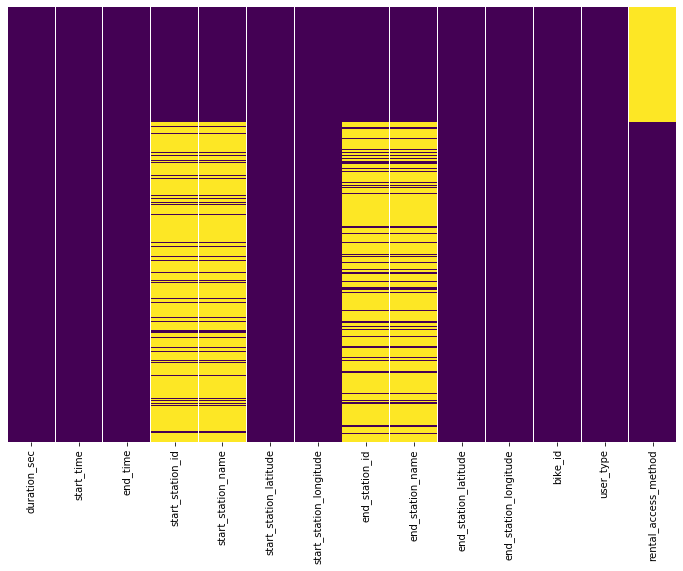

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# Presence of null values

In [11]:
df['duration_sec'].value_counts().mean()
# Mean of the duration of the bike rented (Seconds)

63.872654749593735

In [12]:
df['user_type'].value_counts()
# Split up of the user types using the bike

Subscriber    277446
Customer      154908
Name: user_type, dtype: int64

In [13]:
df['rental_access_method'].value_counts()
# Split up of the rental access methods used by the users

app        293205
clipper     24638
Name: rental_access_method, dtype: int64

In [14]:
df.duplicated().sum()
# Checking for any duplicate values

0

In [15]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
# Converting into date time format

In [16]:
df['duration_minute'] = df['duration_sec']/60
# Converting the seconds into ride duration minutes

In [17]:
# Obtaining start date, month, year, start hour of the ride and day of week the ride was initiated
df['start_date'] = df.start_time.dt.strftime('%d')
df['start_month'] = df.start_time.dt.strftime('%m')
df['start_year'] = df.start_time.dt.strftime('%Y')
df['start_hourofday'] = df.start_time.dt.strftime('%H')
df['start_dayofweek'] = df.start_time.dt.strftime('%A')


In [18]:
df
# New columns added

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method,duration_minute,start_date,start_month,start_year,start_hourofday,start_dayofweek
0,62083,2020-02-29 18:32:30.575,2020-03-01 11:47:14.085,176.0,MacArthur BART Station,37.828410,-122.266315,267.0,Derby St at College Ave,37.861804,-122.253569,1993,Customer,NaN,1034.716667,29,02,2020,18,Saturday
1,1364,2020-02-29 23:53:53.719,2020-03-01 00:16:37.972,375.0,Grove St at Masonic Ave,37.774836,-122.446546,506.0,7th Ave at Clement St,37.782439,-122.465377,12402,Customer,NaN,22.733333,29,02,2020,23,Saturday
2,836,2020-02-29 23:54:03.197,2020-03-01 00:07:59.849,375.0,Grove St at Masonic Ave,37.774836,-122.446546,454.0,7th Ave at Cabrillo St,37.775176,-122.465007,2302,Customer,NaN,13.933333,29,02,2020,23,Saturday
3,1004,2020-02-29 23:48:34.648,2020-03-01 00:05:19.202,179.0,Telegraph Ave at 27th St,37.816073,-122.267886,200.0,2nd Ave at E 18th St,37.800214,-122.253810,902,Customer,NaN,16.733333,29,02,2020,23,Saturday
4,1007,2020-02-29 23:48:25.900,2020-03-01 00:05:13.449,179.0,Telegraph Ave at 27th St,37.816073,-122.267886,200.0,2nd Ave at E 18th St,37.800214,-122.253810,11578,Customer,NaN,16.783333,29,02,2020,23,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432349,2321,2020-02-27 17:29:40.000,2020-02-27 18:08:22.000,NaN,NaN,37.810553,-122.476472,NaN,NaN,37.789625,-122.459580,157125,Subscriber,app,38.683333,27,02,2020,17,Thursday
432350,1526,2020-02-01 18:01:12.000,2020-02-01 18:26:39.000,NaN,NaN,37.810568,-122.410974,NaN,NaN,37.807980,-122.414038,648380,Customer,app,25.433333,01,02,2020,18,Saturday
432351,2596,2020-02-04 15:39:49.000,2020-02-04 16:23:06.000,NaN,NaN,37.810572,-122.476453,NaN,NaN,37.806278,-122.422227,438416,Subscriber,app,43.266667,04,02,2020,15,Tuesday
432352,3072,2020-02-25 20:22:22.000,2020-02-25 21:13:34.000,NaN,NaN,37.810688,-122.410335,NaN,NaN,37.807886,-122.418122,926639,Customer,app,51.200000,25,02,2020,20,Tuesday


In [19]:
df = df.drop(['duration_sec','start_time','end_time','start_station_id', 'start_station_name', 'end_station_id','end_station_name'], axis=1)

# Deleting the previous columns


In [20]:
df
# Complete dataset obtained to do visualizations upon


,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method,duration_minute,start_date,start_month,start_year,start_hourofday,start_dayofweek
0,37.828410,-122.266315,37.861804,-122.253569,1993,Customer,NaN,1034.716667,29,02,2020,18,Saturday
1,37.774836,-122.446546,37.782439,-122.465377,12402,Customer,NaN,22.733333,29,02,2020,23,Saturday
2,37.774836,-122.446546,37.775176,-122.465007,2302,Customer,NaN,13.933333,29,02,2020,23,Saturday
3,37.816073,-122.267886,37.800214,-122.253810,902,Customer,NaN,16.733333,29,02,2020,23,Saturday
4,37.816073,-122.267886,37.800214,-122.253810,11578,Customer,NaN,16.783333,29,02,2020,23,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
432349,37.810553,-122.476472,37.789625,-122.459580,157125,Subscriber,app,38.683333,27,02,2020,17,Thursday
432350,37.810568,-122.410974,37.807980,-122.414038,648380,Customer,app,25.433333,01,02,2020,18,Saturday
432351,37.810572,-122.476453,37.806278,-122.422227,438416,Subscriber,app,43.266667,04,02,2020,15,Tuesday
432352,37.810688,-122.410335,37.807886,-122.418122,926639,Customer,app,51.200000,25,02,2020,20,Tuesday


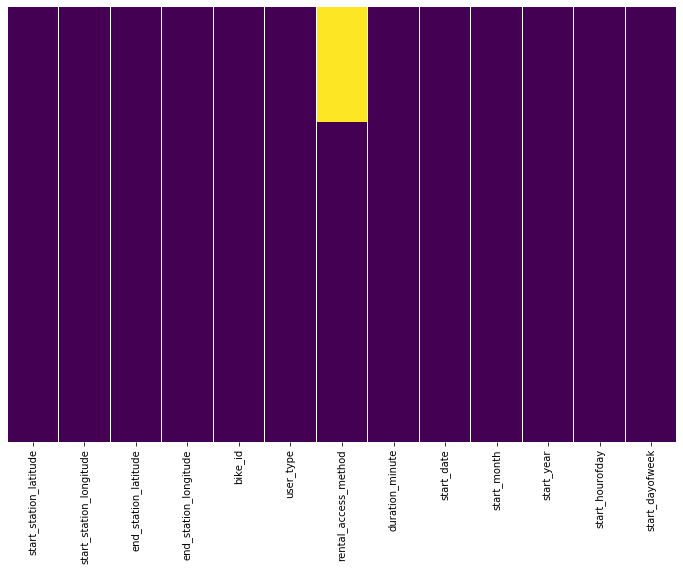

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# Checking for missing values

In [22]:
df.dropna(inplace = True)
# Removing all the observations with missing values

In [23]:
df.info()
# Checking if any missing values left

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317843 entries, 114511 to 432353
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   start_station_latitude   317843 non-null  float64
 1   start_station_longitude  317843 non-null  float64
 2   end_station_latitude     317843 non-null  float64
 3   end_station_longitude    317843 non-null  float64
 4   bike_id                  317843 non-null  int64  
 5   user_type                317843 non-null  object 
 6   rental_access_method     317843 non-null  object 
 7   duration_minute          317843 non-null  float64
 8   start_date               317843 non-null  object 
 9   start_month              317843 non-null  object 
 10  start_year               317843 non-null  object 
 11  start_hourofday          317843 non-null  object 
 12  start_dayofweek          317843 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 33.9+

## Univariate Data Exploration

In [24]:
df['duration_minute'].describe()

count    317843.000000
mean         13.096886
std          14.561049
min           1.000000
25%           6.333333
50%          10.150000
75%          15.816667
max         480.500000
Name: duration_minute, dtype: float64

## Average ride duration statistics

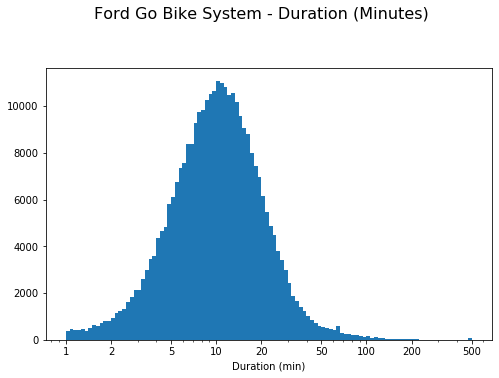

In [52]:
log_binsize = 0.025;
bins = 10 ** np.arange(0, np.log10(df['duration_minute'].max())+log_binsize, log_binsize);

plt.figure(figsize=[8, 5]);
plt.hist(data = df, x = 'duration_minute', bins = bins);
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500], [1, 2, 5, 10, 20, 50, 100, 200, 500]);
plt.suptitle('Ford Go Bike System - Duration (Minutes)', y=1.05, fontsize=16);
plt.xlabel('Duration (min)');

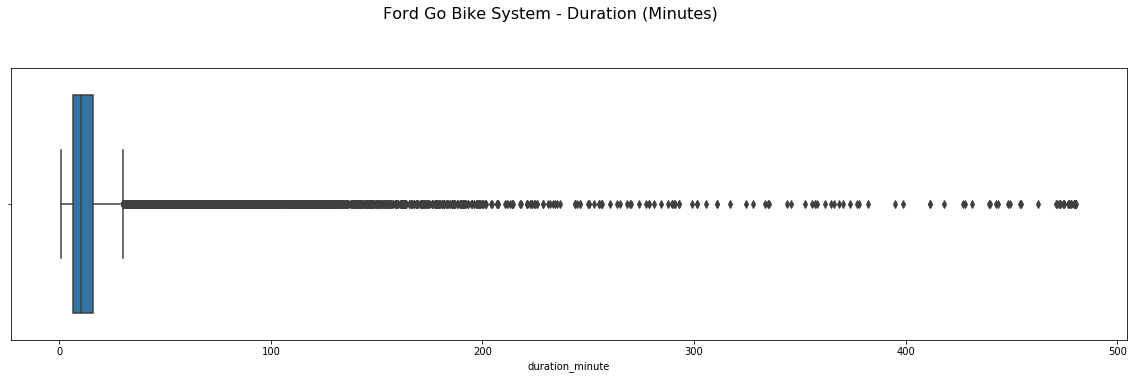

In [53]:
plt.figure(figsize=(20,5));
sns.boxplot(x='duration_minute', data=df);
plt.suptitle('Ford Go Bike System - Duration (Minutes)', y=1.05, fontsize=16);

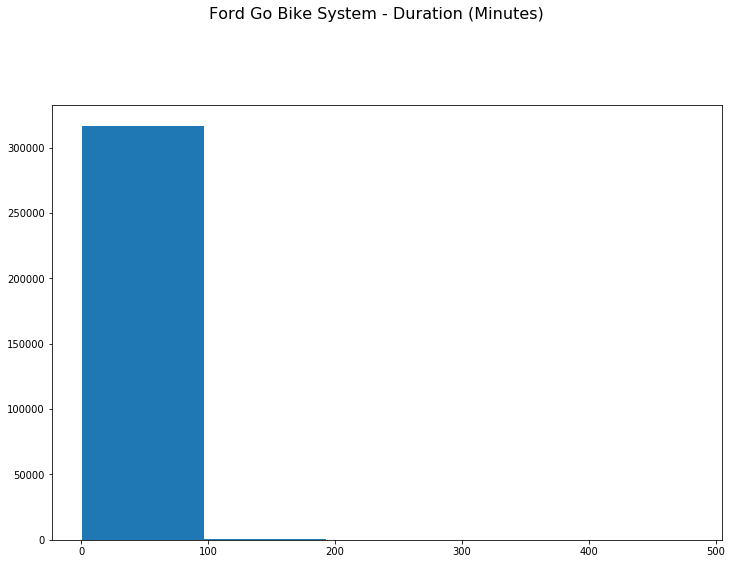

In [54]:
plt.figure(figsize=(12,8));
plt.hist(data = df, x = 'duration_minute', bins = 5);
plt.suptitle('Ford Go Bike System - Duration (Minutes)', y=1.05, fontsize=16);

#### Shows that most of the rides are within 100 minutes with an average ride time/most frequently occuring ride time of 13 minutes

### Peak ride times statistics

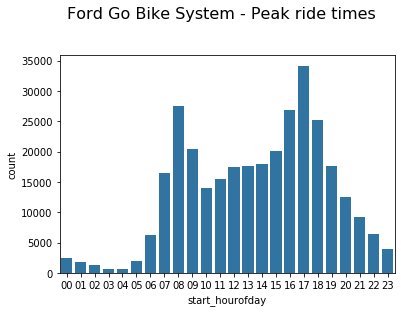

In [55]:
sns.countplot(data = df, x = 'start_hourofday', color = default_color);
plt.suptitle('Ford Go Bike System - Peak ride times', y=1.05, fontsize=16);

#### Most of the bike rides take place between 7 AM to 6 PM with 8 AM and 5 PM being the peak ride times

### Busiest days of the week

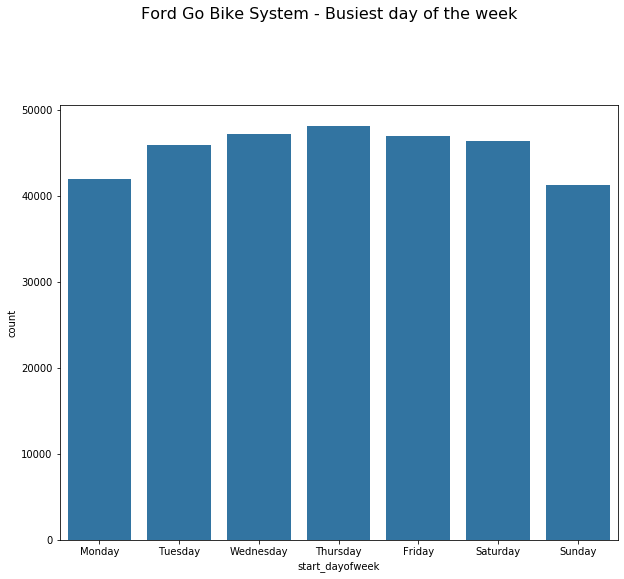

In [56]:
plt.figure(figsize=(10,8));
orderweek = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'];
sns.countplot(data = df, x = 'start_dayofweek', color = default_color, order = orderweek);
plt.suptitle('Ford Go Bike System - Busiest day of the week', y=1.05, fontsize=16);

#### Most bike rides occur on Thursdays. Tuesday to Saturday see most of the rides.

### Common user types

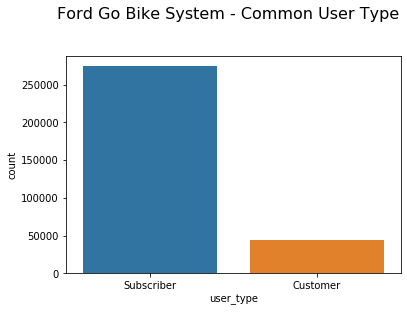

In [57]:
sns.countplot(data = df, x = 'user_type');
plt.suptitle('Ford Go Bike System - Common User Type', y=1.05, fontsize=16);

#### Subscriber' user are more than 'Customer' user by a very big margin

## Bivariate Data Exploration

### Observing correlations

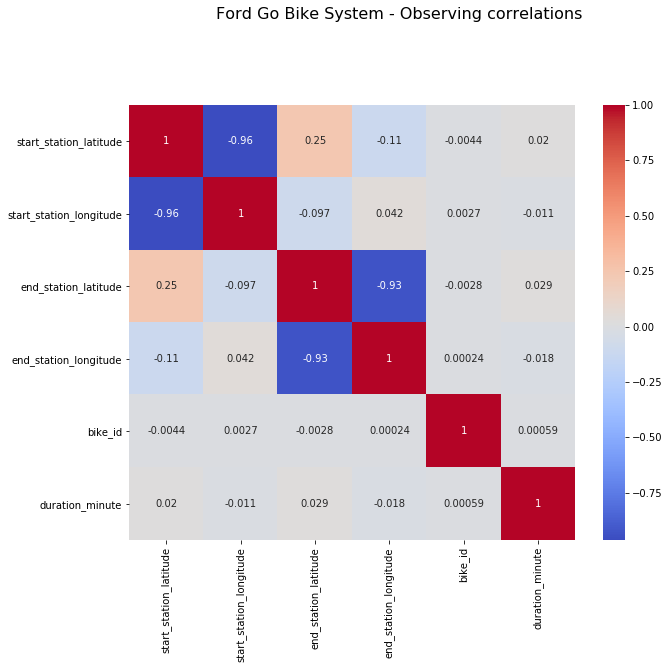

In [58]:
# Understanding the correlation between the numeric values in the dataset
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='coolwarm', annot = True) 
plt.suptitle('Ford Go Bike System - Observing correlations', y=1.05, fontsize=16);


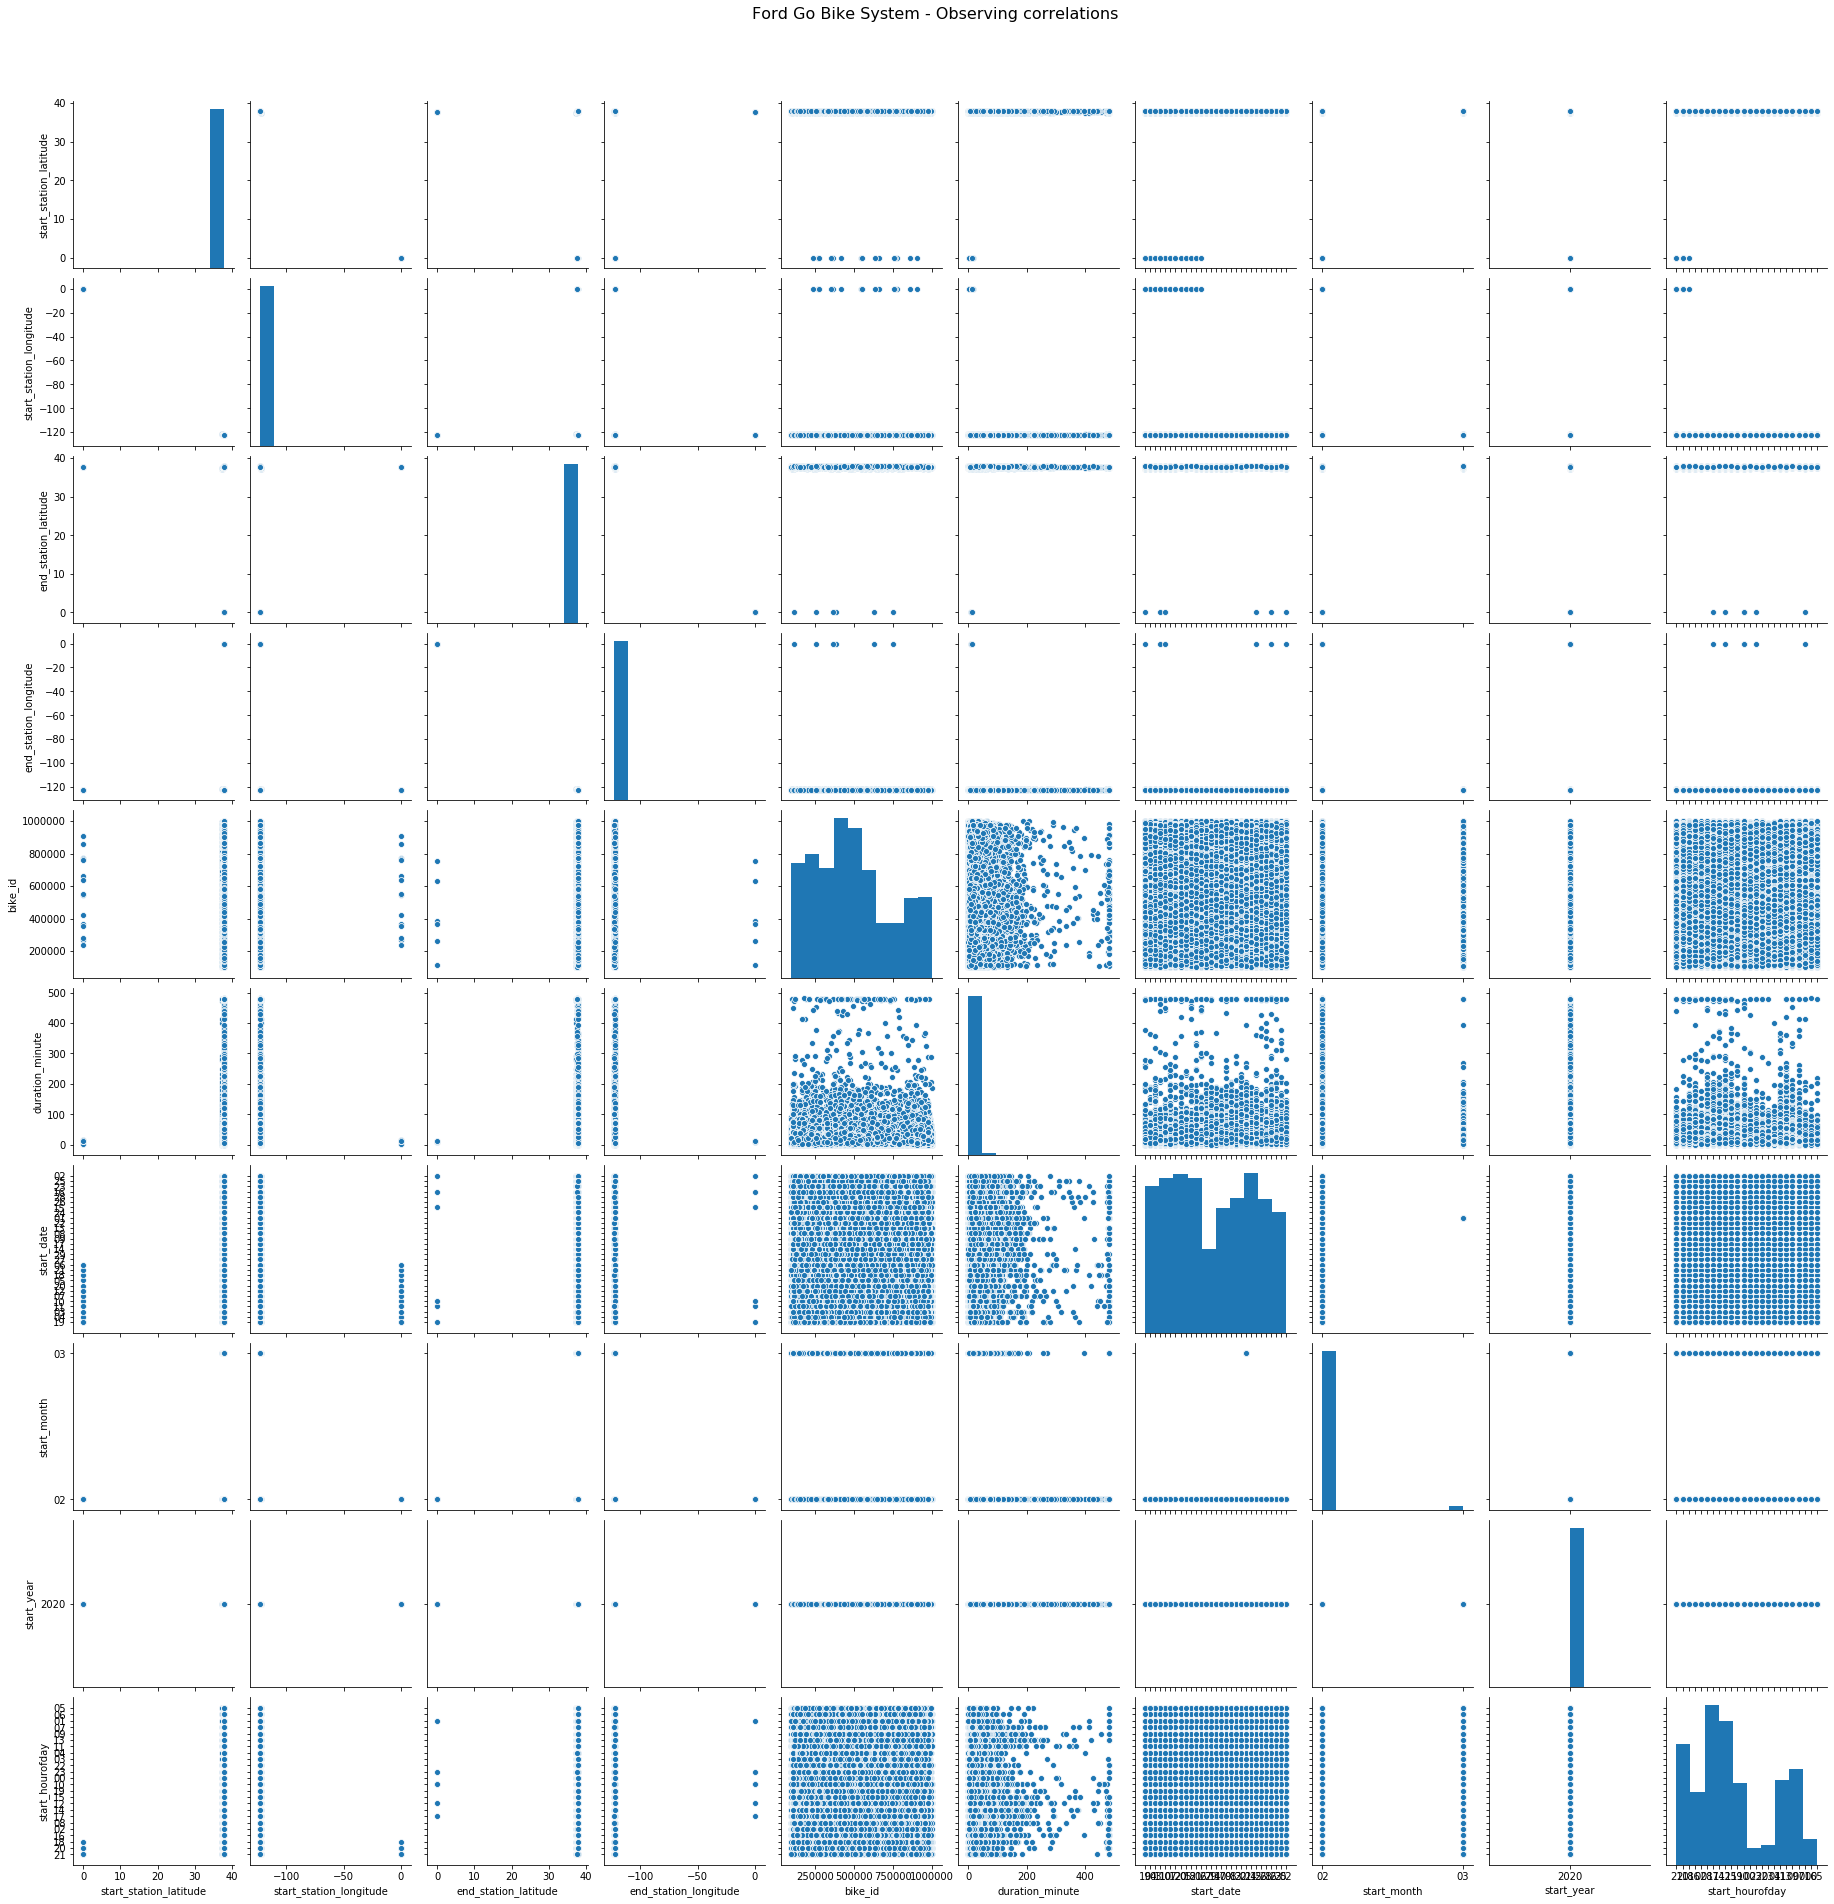

In [59]:
sns.pairplot(df)
plt.suptitle('Ford Go Bike System - Observing correlations', y=1.05, fontsize=16);

#### No strong correlations between variable observed

### Some more correlations

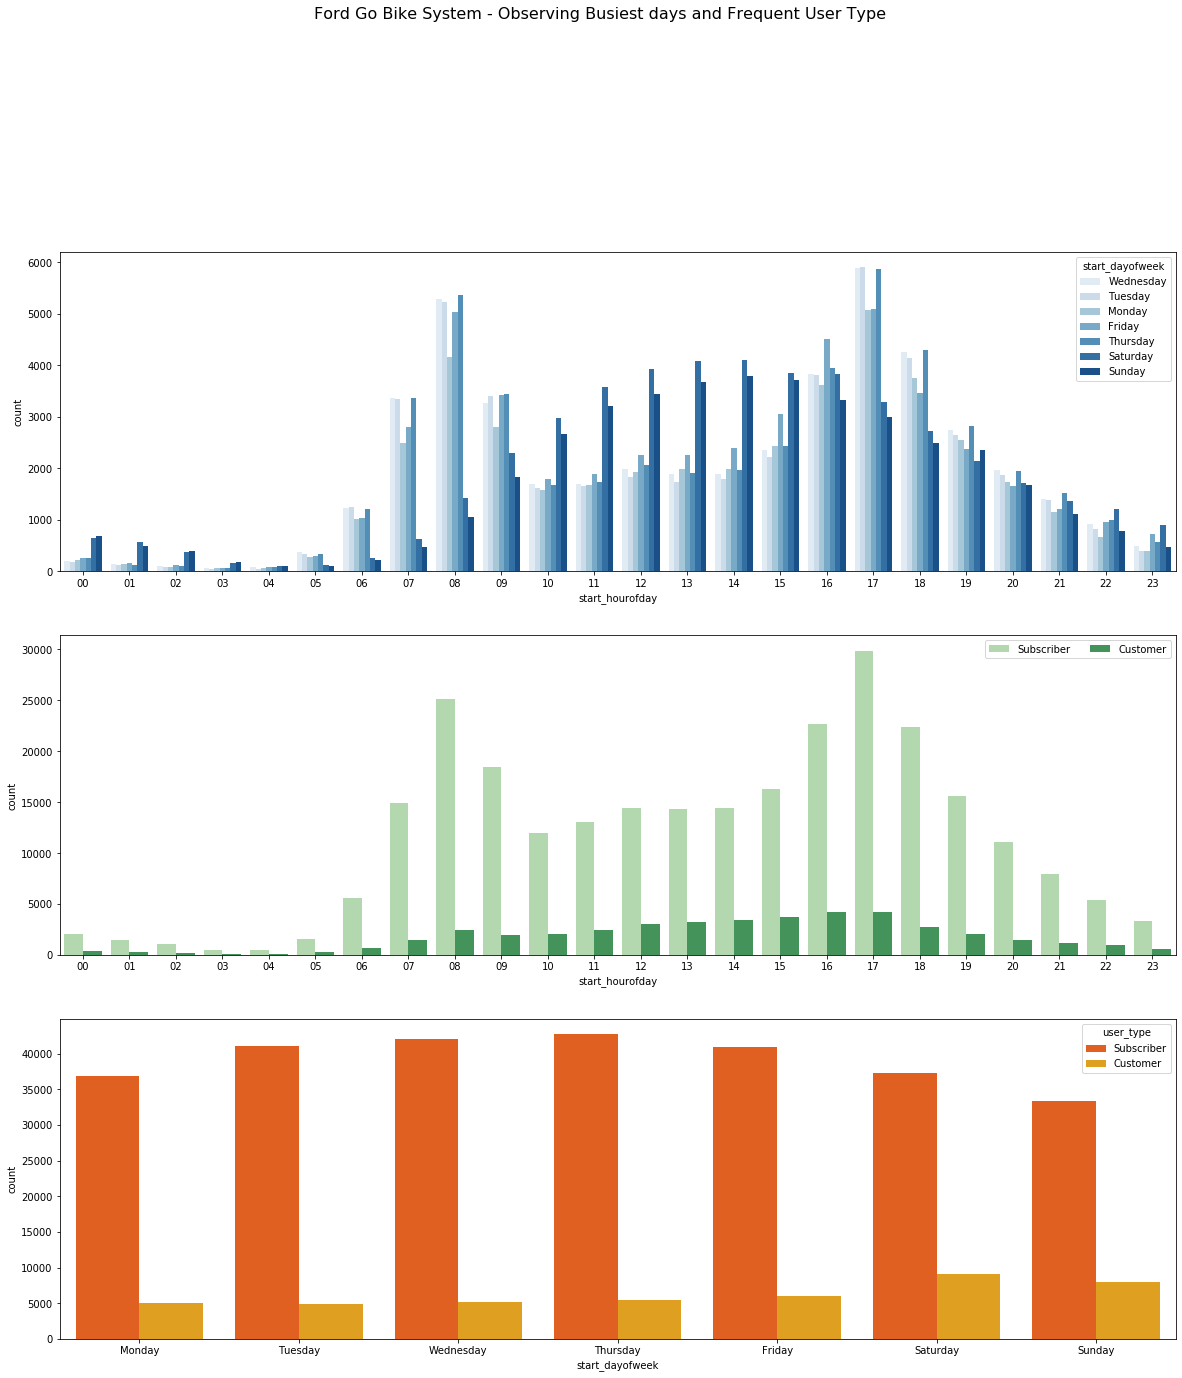

In [60]:
plt.figure(figsize = [20, 20]);
plt.suptitle('Ford Go Bike System - Observing Busiest days and Frequent User Type', y=1.05, fontsize=16);

plt.subplot(3, 1, 1);
sns.countplot(data = df, x = 'start_hourofday', hue = 'start_dayofweek', palette = 'Blues');

ax = plt.subplot(3, 1, 2);
sns.countplot(data = df, x = 'start_hourofday', hue = 'user_type', palette = 'Greens');
ax.legend(loc = 1, ncol = 2); 

ax = plt.subplot(3, 1, 3);
sns.countplot(data = df, x = 'start_dayofweek', hue = 'user_type', palette = 'autumn', order = orderweek);


#### Customer user type usage is more over the weekend.
#### Peak ride traffic is at 8 AM and 5 PM everyday and Thursday sees the maximum user traffic.

### Duration of bike usage based on user type

<Figure size 864x576 with 0 Axes>

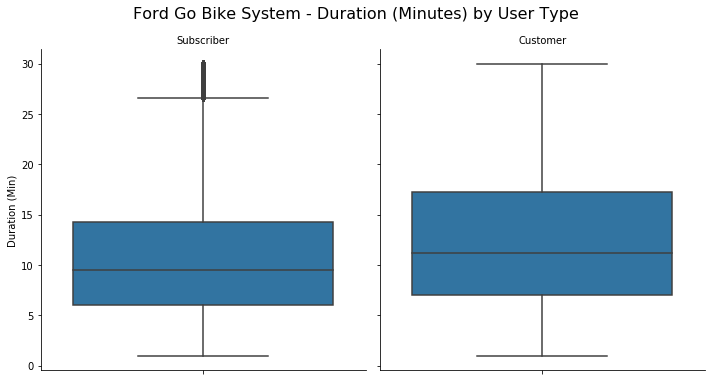

In [37]:
plt.figure(figsize=(12,8));
data = df.query('duration_minute < 30')
g = sns.catplot(data=data, y='duration_minute', col="user_type", kind='box');

g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Duration (Min)")
g.fig.suptitle('Ford Go Bike System - Duration (Minutes) by User Type', y=1.05, fontsize=16);

#### Customer user type have greater average ride durations than Subscriber user type

## Multivariate Data Exploration

<Figure size 864x576 with 0 Axes>

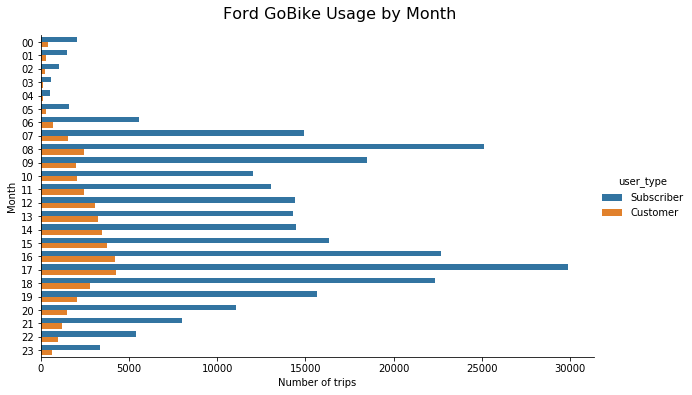

In [39]:
# http://localhost:8888/notebooks/Documents/Data_Analysis_Nanodegree/PROJECT%20-%205/Ford%20GoBike%20System%20Data%20Project.ipynb#Subscriber-user-type-peak-usage-is-on-Thursday-and-Customer-user-type-peak-usage-is-on-Saturday.Monthly usage of the Ford Go Bike system
plt.figure(figsize=(12,8));

graph = sns.catplot(data = df, y = 'start_hourofday', kind = 'count', aspect = 1.7, hue = 'user_type');

graph.set_axis_labels('Number of trips', 'Month');

graph.fig.suptitle('Ford GoBike Usage by Month', y = 1.05, fontsize = 16);

### Bike usage by the month

Text(0.5, 0, 'trip duration in minutes')

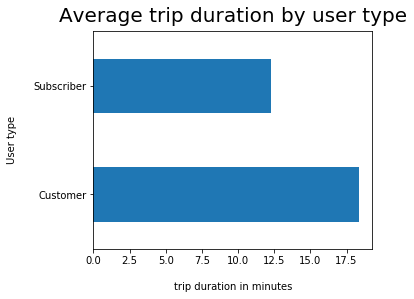

In [40]:
axis = df.groupby('user_type')['duration_minute'].mean().plot(kind='barh', color=default_color, figsize=(5,4))
axis.set_title('Average trip duration by user type', fontsize=20, y=1.015)
axis.set_ylabel('User type', labelpad=16)
axis.set_xlabel('trip duration in minutes', labelpad=16)

#### Average Trip duration for a customer user type (18 minutes)  is greater than the average trip duration of a subscriber user type (12.5 minutes)

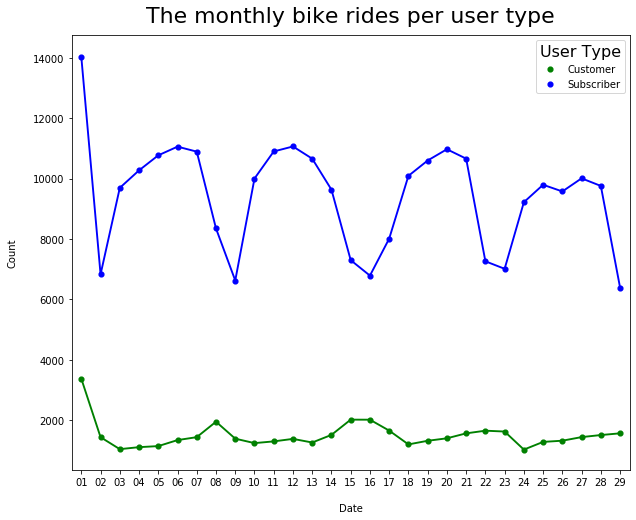

In [41]:
user_type_count = df.groupby(["start_date", "user_type"]).size().reset_index();

plt.figure(figsize=(10,8));
palette = {'Subscriber':'blue', 'Customer':'green'};
axis = sns.pointplot(x='start_date', y=0, hue='user_type', palette=palette, scale=.7, data=user_type_count);
plt.title('The monthly bike rides per user type', fontsize=22, y=1.015);
plt.xlabel('Date', labelpad=16);
plt.ylabel('Count', labelpad=16);
leg = axis.legend();
leg.set_title('User Type',prop={'size':16});
axis = plt.gca();


#### Higher variations and higher count in the usage of bikes is seen with a Subscriber data user than with the customer user type

### Bike usage by the User Type

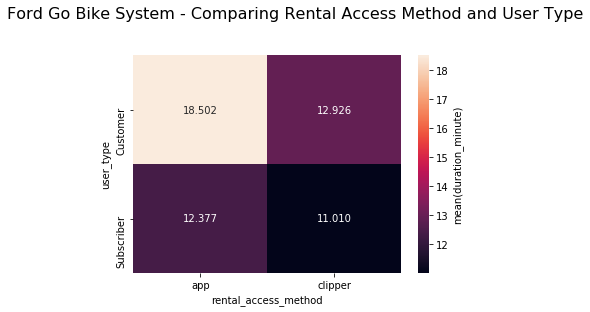

In [62]:
cat_means = df.groupby(['rental_access_method', 'user_type']).mean()['duration_minute']
cat_means = cat_means.reset_index(name = 'duration_minute')
cat_means = cat_means.pivot(index = 'user_type', columns = 'rental_access_method',
                            values = 'duration_minute')
sns.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(duration_minute)'});
plt.suptitle('Ford Go Bike System - Comparing Rental Access Method and User Type', y=1.05, fontsize=16);

#### Customer user type using App rental access method used the bike for more number of minutes.

# Conclusion

1. Bike rides on weekdays had greater usage durations than those on weekends.
2. Bike rides were used maximum on Thursdays.
3. The peak usage time was at 8 AM and 5 PM on weekdays.
4. Customer user type using App rental access method used the bike for more number of minutes.
5. Subscriber user type peak usage is on Thursday and Customer user type peak usage is on Saturday
6. Higher variations and higher count in the usage of bikes is seen with a Subscriber data user than with the customer user type
7. Average Trip duration for a customer user type (18 minutes) is greater than the average trip duration of a subscriber user type (12.5 minutes)
8. Most of the rides are within 100 minutes with an average ride time/most frequently occuring ride time of 13 minutes.


In [ ]:
!jupyter nbconvert Ford_GoBike-Copy2.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook Ford_GoBike-Copy2.ipynb to slides
[NbConvertApp] Writing 1327462 bytes to Ford_GoBike-Copy2.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Ford_GoBike-Copy2.slides.html
Use Control-C to stop this server
